# Dataset Reading

In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi  #To authenticate your kaggle api
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import MobileNetV2



In [3]:
# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()
dataset_id = "msambare/fer2013"
current_directory = os.getcwd()
#api.dataset_download_files(dataset_id, path= current_directory, unzip=True)

In [4]:
# Label mapping
label_map = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'sad': 4,
    'surprise': 5,
    'neutral': 6
}

def load_images_from_folder(folder_path, img_size=(48, 48)):
    X, y = [], []
    for label in os.listdir(folder_path):  # e.g., "angry", "happy", etc.
        label_path = os.path.join(folder_path, label)
        if not os.path.isdir(label_path):
            continue
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                X.append(img)
                y.append(label_map[label.lower()])  # map string to integer label
    return np.array(X), np.array(y)

# Load train and test
current_directory = os.getcwd()
train_path = os.path.join(current_directory, 'train')
test_path = os.path.join(current_directory, 'test')

X_train, y_train = load_images_from_folder(train_path)
X_test, y_test = load_images_from_folder(test_path)

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input: (samples, height, width, channels)
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



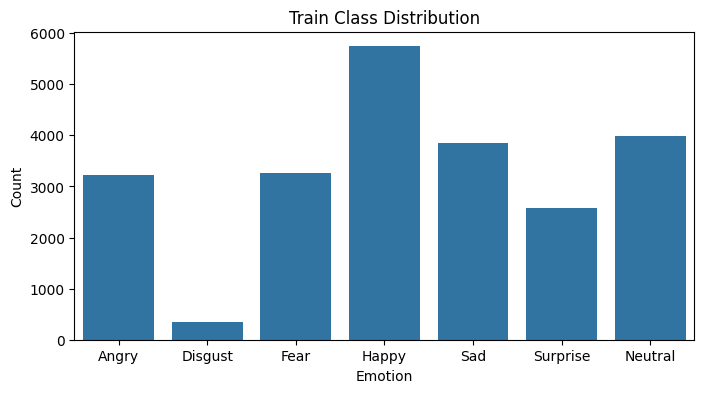

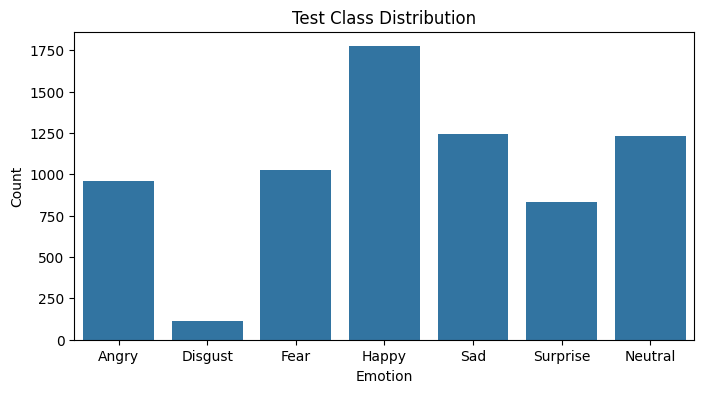

In [12]:
# Reverse label_map for visualization
label_map_inv = {v: k.capitalize() for k, v in label_map.items()}

# Convert one-hot back to class labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Plot train distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_labels)
plt.title("Train Class Distribution")
plt.xticks(ticks=range(7), labels=[label_map_inv[i] for i in range(7)])
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

# Plot test distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=y_test_labels)
plt.title("Test Class Distribution")
plt.xticks(ticks=range(7), labels=[label_map_inv[i] for i in range(7)])
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


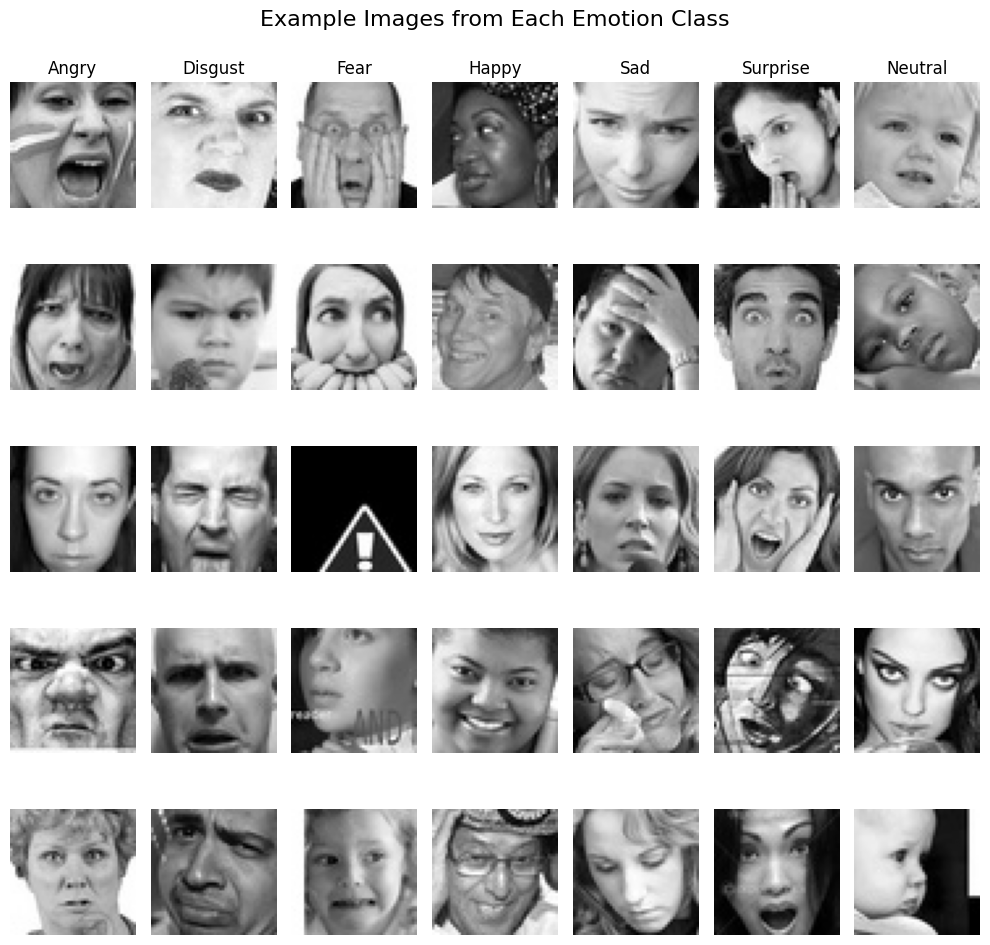

In [13]:
def show_examples(X, y, label_map_inv, samples_per_class=5):
    plt.figure(figsize=(samples_per_class * 2, 10))
    for class_id in range(7):
        idxs = np.where(np.argmax(y, axis=1) == class_id)[0][:samples_per_class]
        for i, idx in enumerate(idxs):
            plt_idx = i * 7 + class_id + 1
            plt.subplot(samples_per_class, 7, plt_idx)
            plt.imshow(X[idx].reshape(48, 48), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(label_map_inv[class_id])
    plt.suptitle("Example Images from Each Emotion Class", fontsize=16)
    plt.tight_layout()
    plt.show()

show_examples(X_train, y_train, label_map_inv)


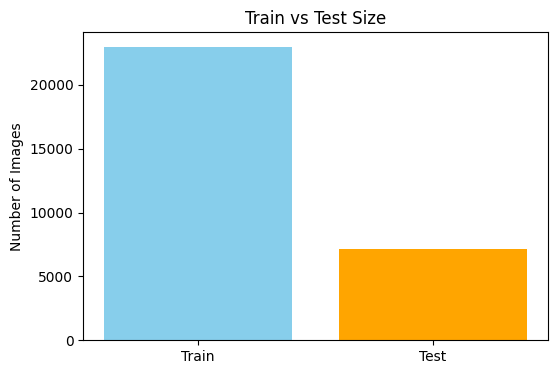

In [14]:
# Plot total samples
plt.figure(figsize=(6, 4))
counts = [len(X_train), len(X_test)]
plt.bar(['Train', 'Test'], counts, color=['skyblue', 'orange'])
plt.title("Train vs Test Size")
plt.ylabel("Number of Images")
plt.show()


In [5]:
# Assuming y_train is already one-hot encoded
y_train_labels = np.argmax(y_train, axis=1)  # Get the original integer labels

# Calculate class weights based on the original labels
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weight_dict = dict(enumerate(class_weights))



Epoch 1/50


718/718 [==============================] - 421s 583ms/step - loss: 1.8370 - accuracy: 0.2532 - val_loss: 1.7198 - val_accuracy: 0.3520
Epoch 2/50


c:\Users\mohamed ahmed\anaconda3\envs\tfenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


718/718 [==============================] - 401s 559ms/step - loss: 1.7082 - accuracy: 0.3102 - val_loss: 1.6455 - val_accuracy: 0.3844
Epoch 3/50
718/718 [==============================] - 432s 602ms/step - loss: 1.6730 - accuracy: 0.3324 - val_loss: 1.5744 - val_accuracy: 0.4114
Epoch 4/50
718/718 [==============================] - 438s 611ms/step - loss: 1.6317 - accuracy: 0.3476 - val_loss: 1.5305 - val_accuracy: 0.4201
Epoch 5/50
718/718 [==============================] - 439s 611ms/step - loss: 1.6144 - accuracy: 0.3525 - val_loss: 1.5505 - val_accuracy: 0.4084
Epoch 6/50
718/718 [==============================] - 430s 599ms/step - loss: 1.5893 - accuracy: 0.3627 - val_loss: 1.5955 - val_accuracy: 0.3788
Epoch 7/50
718/718 [==============================] - 434s 604ms/step - loss: 1.5800 - accuracy: 0.3660 - val_loss: 1.5610 - val_accuracy: 0.4011
Epoch 8/50
718/718 [==============================] - 431s 600ms/step - loss: 1.5571 - accuracy: 0.3759 - val_loss: 1.5341 - val_accura

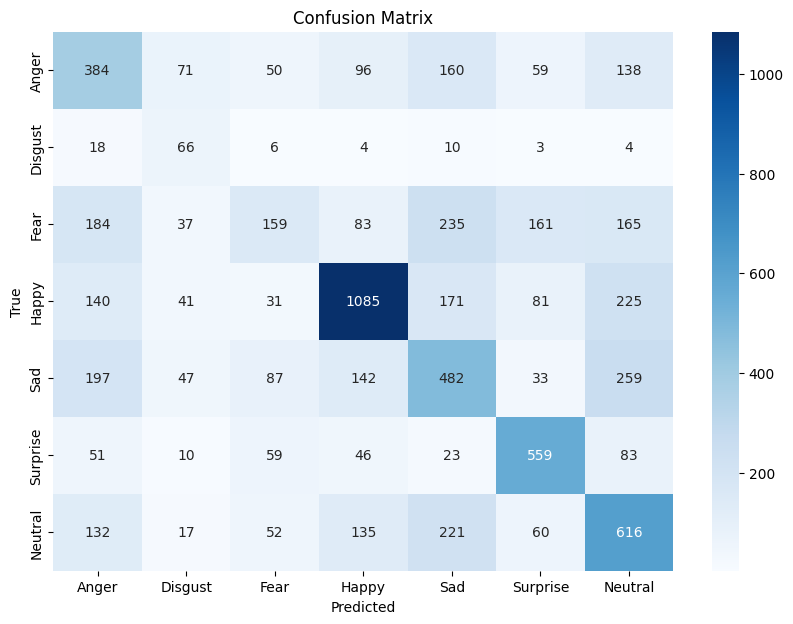

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ----------- Custom Data Generator -----------

class GrayToRGBResizedGenerator(Sequence):
    def __init__(self, X, y, batch_size=32, shuffle=True):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(X))

    def __len__(self):
        return int(np.ceil(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        batch_idx = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_X = self.X[batch_idx]
        batch_y = self.y[batch_idx]

        # Convert grayscale (48x48x1 or 48x48) to RGB and resize to 224x224
        if batch_X.ndim == 3:
            batch_X = np.expand_dims(batch_X, -1)

        batch_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(batch_X, dtype=tf.float32))
        batch_resized = tf.image.resize(batch_rgb, [224, 224])
        return batch_resized.numpy(), batch_y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# ----------- Create Generators -----------

train_gen = GrayToRGBResizedGenerator(X_train, y_train)
val_gen = GrayToRGBResizedGenerator(X_val, y_val)
test_gen = GrayToRGBResizedGenerator(X_test, y_test, shuffle=False)

# ----------- Model with MobileNetV2 -----------

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(7, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# ----------- Training -----------

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=50,
                    class_weight=class_weight_dict,
                    callbacks=[early_stopping, checkpoint])

# ----------- Evaluation -----------

model.load_weights('best_model.h5')
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

acc = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {acc * 100:.2f}%")

# ----------- Confusion Matrix -----------

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
            yticklabels=['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()




225/225 [==============================] - 130s 570ms/step
Test Accuracy: 46.68%


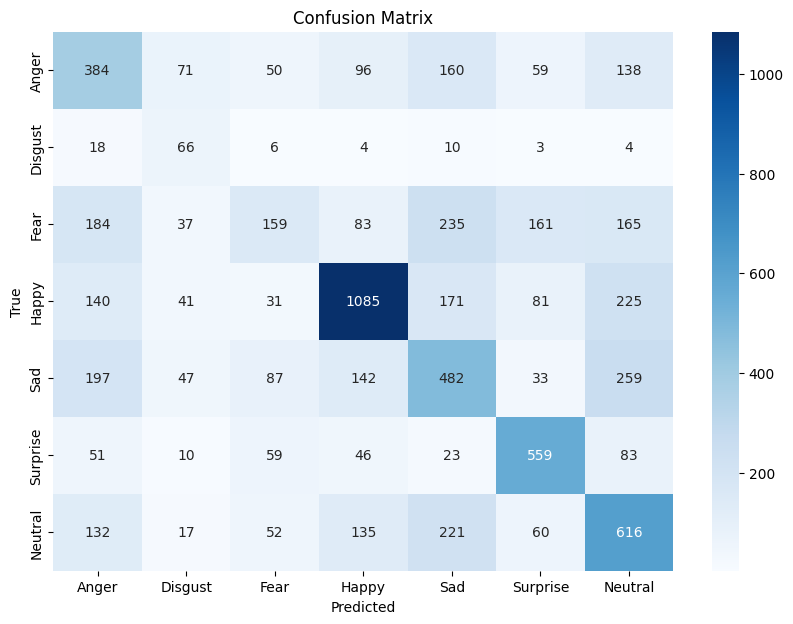

In [8]:

# ----------- Evaluation -----------
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
class GrayToRGBResizedGenerator(Sequence):
    def __init__(self, X, y, batch_size=32, shuffle=True):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(X))

    def __len__(self):
        return int(np.ceil(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        batch_idx = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_X = self.X[batch_idx]
        batch_y = self.y[batch_idx]

        # Convert grayscale (48x48x1 or 48x48) to RGB and resize to 224x224
        if batch_X.ndim == 3:
            batch_X = np.expand_dims(batch_X, -1)

        batch_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(batch_X, dtype=tf.float32))
        batch_resized = tf.image.resize(batch_rgb, [224, 224])
        return batch_resized.numpy(), batch_y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# ----------- Create Generators -----------

train_gen = GrayToRGBResizedGenerator(X_train, y_train)
val_gen = GrayToRGBResizedGenerator(X_val, y_val)
test_gen = GrayToRGBResizedGenerator(X_test, y_test, shuffle=False)

# ----------- Model with MobileNetV2 -----------

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(7, activation='softmax')(x)

model = Model(inputs, outputs)
model.load_weights('best_model.h5')
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

acc = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {acc * 100:.2f}%")

# ----------- Confusion Matrix -----------

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
            yticklabels=['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
